In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import json
import numpy as np

In [3]:
import seaborn as sbn

In [4]:
import matplotlib.pyplot as plt

# Load Data

In [5]:
path = "data/dump.json"

In [6]:
with open(path) as json_file: 
    data = json.load(json_file)

In [7]:
funding_release_amount = len(data["haku"])
project_amount = len(data["loppuselvitys"]); funding_release_amount, project_amount

(62, 1884)

# Number of Fundings

In [8]:
funding_releases = {}
for i in range(funding_release_amount):
    project_name = data["haku"][i]["content"]["name"]["fi"]
    project_id = data["haku"][i]["id"]
    funding_releases[project_id] = project_name

In [9]:
project_names = pd.Series([data["loppuselvitys"][i]["project_name"] for i in range(project_amount)]); # loppuselvitys_project_names.head()
project_ids = pd.Series([data["loppuselvitys"][i]["haku_id"] for i in range(project_amount)]); # loppuselvitys_project_ids.head()

In [10]:
funding_release_counts = {funding_releases[key]:value for key,value in project_ids.value_counts().items()}; funding_release_counts

{'Kärkihanke 1 - hakuryhmä 2: Tutoropettajien toiminta': 287,
 'Kärkihanke 1 - hakuryhmä 1: Tutoropettajien koulutus ja osaamisen kehittäminen': 273,
 'Kärkihanke 1 - hakuryhmä A: Tutoropettajien toiminta ja kouluttaminen 2017': 174,
 'Opetustoimen ja varhaiskasvatuksen henkilöstökoulutus 2016 ': 140,
 'Opetustoimen ja varhaiskasvatuksen henkilöstökoulutus 2017': 127,
 'Valtion erityisavustus esi- ja perusopetuksen tasa-arvoa edistäviin toimenpiteisiin 2018': 90,
 'Varhaiskasvatuksen kehittäminen': 85,
 'Yleissivistävän koulutuksen kansainvälistyminen, kansainvälistymisen kehittämishankkeet': 42,
 'Osaamisperusteisuuden ja asiakaslähtöisyyden edistäminen': 48,
 'Valtionavustukset kielikylpytoiminnan laajentamiseen': 4,
 'Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa ': 32,
 'Kärkihanke 1 - hakuryhmä 3: Kokeilu-, kehittämis- ja innovaatiotoiminta': 29,
 'Valmistelevat vierailut ERASMUS + yleissivistävälle koulutukselle  2019': 27,
 'Val

# Visualizations

In [11]:
municipality_population = {
"Uusimaa": 1700448,
"Varsinais-Suomi": 480968,
"Satakunta": 215650,
"Häme": 170637,
"Pirkanmaa": 520532,
"Päijät-Häme": 199134,
"Kymenlaakso": 169904,
"Etelä-Karjala": 127248,
"Etelä-Savo": 141150,
"Pohjois-Savo": 243654,
"Pohjois-Karjala": 160523,
"Keski-Suomi": 275080,
"Etelä-Pohjanmaa": 187831,
"Pohjanmaa": 180541,
"Keski-Pohjanmaa": 67930,
"Pohjois-Pohjanmaa": 413550,
"Kainuu": 71839,
"Lappi": 176716,
"Ahvenanmaa": 30055
}

In [12]:
finland_population = np.array(list(municipality_population.values()), dtype = int).sum(); finland_population

5533390

In [13]:
municipality_names  = list(municipality_population.keys())

In [14]:
percentage_of_total_populuation  = np.array(list(municipality_population.values())) / finland_population

In [15]:
percentage_of_total_populuation = dict(zip(municipality_names, percentage_of_total_populuation)); percentage_of_total_populuation

{'Uusimaa': 0.30730673240093326,
 'Varsinais-Suomi': 0.08692103755563949,
 'Satakunta': 0.038972492450378524,
 'Häme': 0.030837696240460188,
 'Pirkanmaa': 0.09407108481419166,
 'Päijät-Häme': 0.03598770374038338,
 'Kymenlaakso': 0.03070522771754747,
 'Etelä-Karjala': 0.02299639100081505,
 'Etelä-Savo': 0.025508774910136464,
 'Pohjois-Savo': 0.04403340447718306,
 'Pohjois-Karjala': 0.029009883633721822,
 'Keski-Suomi': 0.0497127439056347,
 'Etelä-Pohjanmaa': 0.03394501381612357,
 'Pohjanmaa': 0.032627557428628745,
 'Keski-Pohjanmaa': 0.012276380302129436,
 'Pohjois-Pohjanmaa': 0.07473718642640406,
 'Kainuu': 0.012982818850650325,
 'Lappi': 0.03193629944753578,
 'Ahvenanmaa': 0.005431570881503021}

## Project Amounts

### All Applications

In [16]:
municipality_amount = len(municipality_names)

In [18]:
municipality_projects_amount = np.array(list(percentage_of_total_populuation.values())) * project_amount
municipality_projects_amount = municipality_projects_amount * np.random.normal(1, 0.1, size=municipality_amount)
municipality_projects_amount = municipality_projects_amount.astype(int)

In [19]:
df = pd.DataFrame()
df["Kunta" ] = municipality_names
df["Hannkeiden Maara"] = municipality_projects_amount

In [20]:
df = df.sort_values("Hannkeiden Maara", ascending = False)

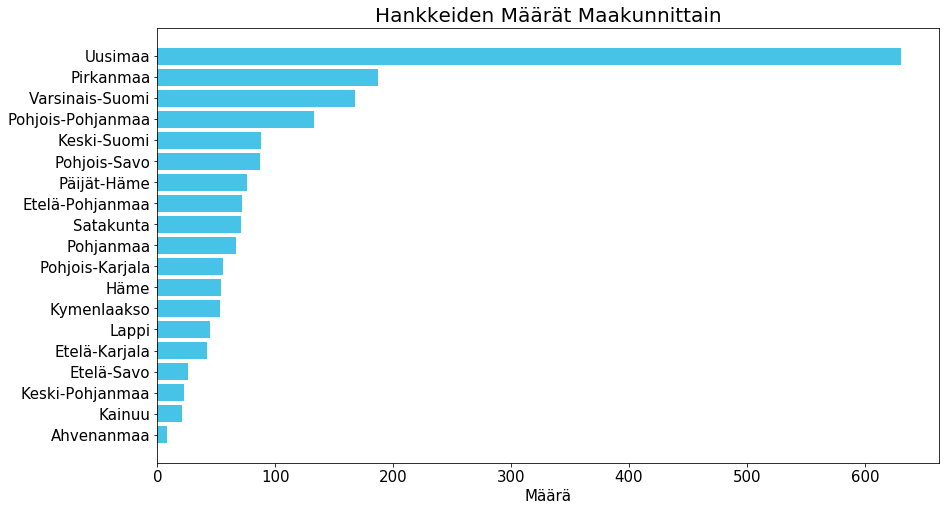

In [21]:
fig, ax = plt.subplots(figsize = (14, 8))

ax.barh(df["Kunta"], df["Hannkeiden Maara"], align='center', color = "#46C3E7")
# ax.set_yticks(m)
plt.xticks(fontsize = 15)
ax.set_xlabel('Määrä', fontsize = 15)
ax.set_yticklabels(df["Kunta"], fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Hankkeiden Määrät Maakunnittain', fontsize = 20)
plt.savefig('data/kokomaa_kaikkiteemat_kaikkikoulutusasteet_hakemustenmäärä.png')
plt.show()

### Peruskoulu

In [22]:
project_amount = int(len(data["loppuselvitys"]) * 0.24); project_amount

452

In [24]:
municipality_projects_amount = np.array(list(percentage_of_total_populuation.values())) * project_amount
municipality_projects_amount = municipality_projects_amount * np.random.normal(1, 0.1, size=municipality_amount)
municipality_projects_amount = municipality_projects_amount.astype(int)

In [25]:
df = pd.DataFrame()
df["Kunta" ] = municipality_names
df["Hannkeiden Maara"] = municipality_projects_amount

In [26]:
df = df.sort_values("Hannkeiden Maara", ascending = False)

In [27]:
m, n = df.shape

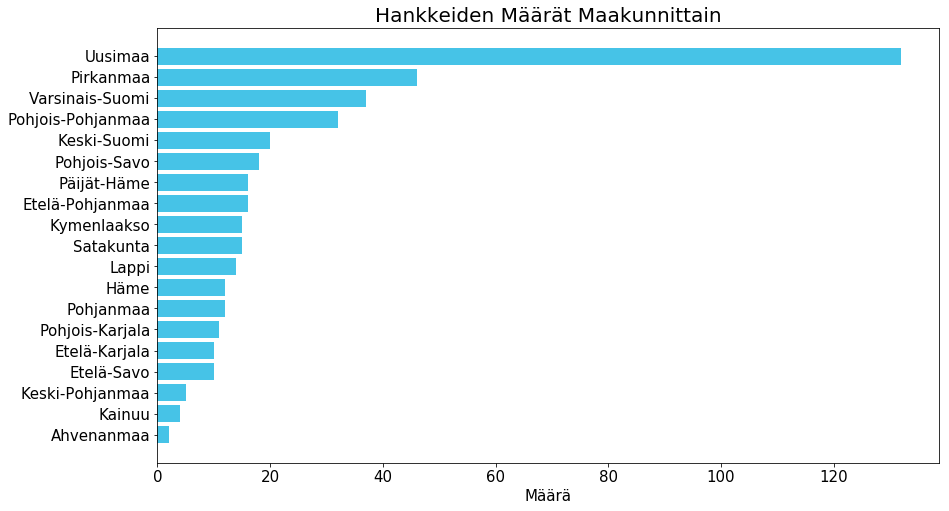

In [28]:
fig, ax = plt.subplots(figsize = (14, 8))

ax.barh(df["Kunta"], df["Hannkeiden Maara"], align='center', color = "#46C3E7")
# ax.set_yticks(m)
plt.xticks(fontsize = 15)
ax.set_xlabel('Määrä', fontsize = 15)
ax.set_yticklabels(df["Kunta"], fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Hankkeiden Määrät Maakunnittain', fontsize = 20)
plt.savefig('data/kokomaa_kaikkiteemat_peruskoulu_hakemustenmäärä.png')
plt.show()

### Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017

In [29]:
funding_release_id = 82 
funding_release_name = funding_releases[funding_release_id]; funding_release_name

'Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017'

In [30]:
project_for_funding = [report for report in data["loppuselvitys"] if(report["haku_id"] == funding_release_id)]

In [31]:
project_amount = len(project_for_funding); project_amount

25

In [32]:
municipality_projects_amount = np.array(list(percentage_of_total_populuation.values())) * project_amount
municipality_projects_amount = municipality_projects_amount * np.random.normal(1, 0.1, size=m)
municipality_projects_amount = municipality_projects_amount.astype(int)

In [33]:
df = pd.DataFrame()
df["Kunta" ] = municipality_names
df["Hannkeiden Maara"] = municipality_projects_amount

In [34]:
df = df.sort_values("Hannkeiden Maara", ascending = False)

In [35]:
m, n = df.shape

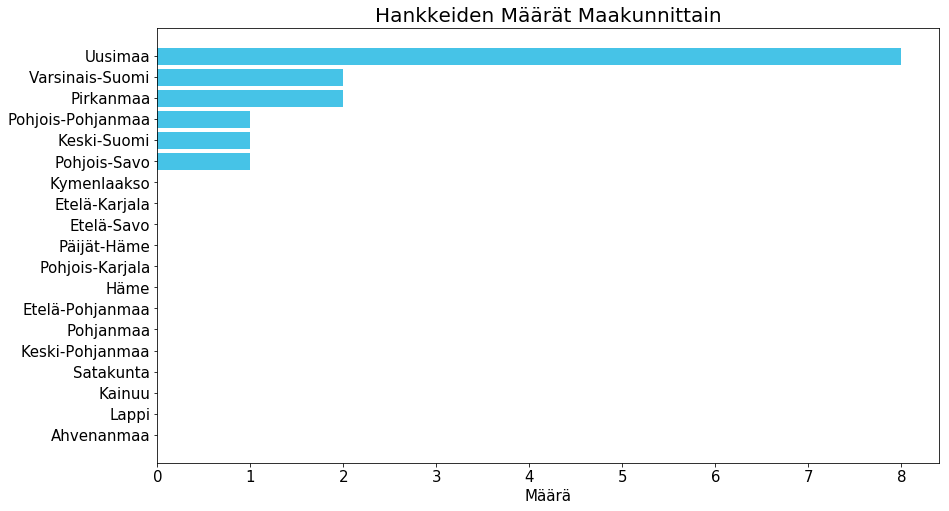

In [36]:
fig, ax = plt.subplots(figsize = (14, 8))

ax.barh(df["Kunta"], df["Hannkeiden Maara"], align='center', color = "#46C3E7")
# ax.set_yticks(m)
plt.xticks(fontsize = 15)
ax.set_xlabel('Määrä', fontsize = 15)
ax.set_yticklabels(df["Kunta"], fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Hankkeiden Määrät Maakunnittain', fontsize = 20)
plt.savefig('data/kokomaa_kaikkiteemat_kaikkikoulutusasteet_innovaatio_hakemustenmäärä.png')
plt.show()

## Rahoitusten Suuruudet

In [58]:
def total_costs(project):
    total_costs = 0
    for question in project['loppuselvitys_answers']["value"]:
        keys = question.keys()
        if("key" in keys):
            if("costs" in question["key"] and "amount" in question["key"] ):
                # print("Cost")
                # print(question["value"] == "")
                if(question["value"] != ""):
                    total_costs += int(question["value"])
                # print(question["key"])
                # print(question["value"])
    return total_costs

In [59]:
project_costs = {}
for project in data["loppuselvitys"]:
    name = project['project_name']
    cost = total_costs(project)
    project_costs[name] = cost

In [60]:
x_ticks = np.arange(0, 1000000, 50000)

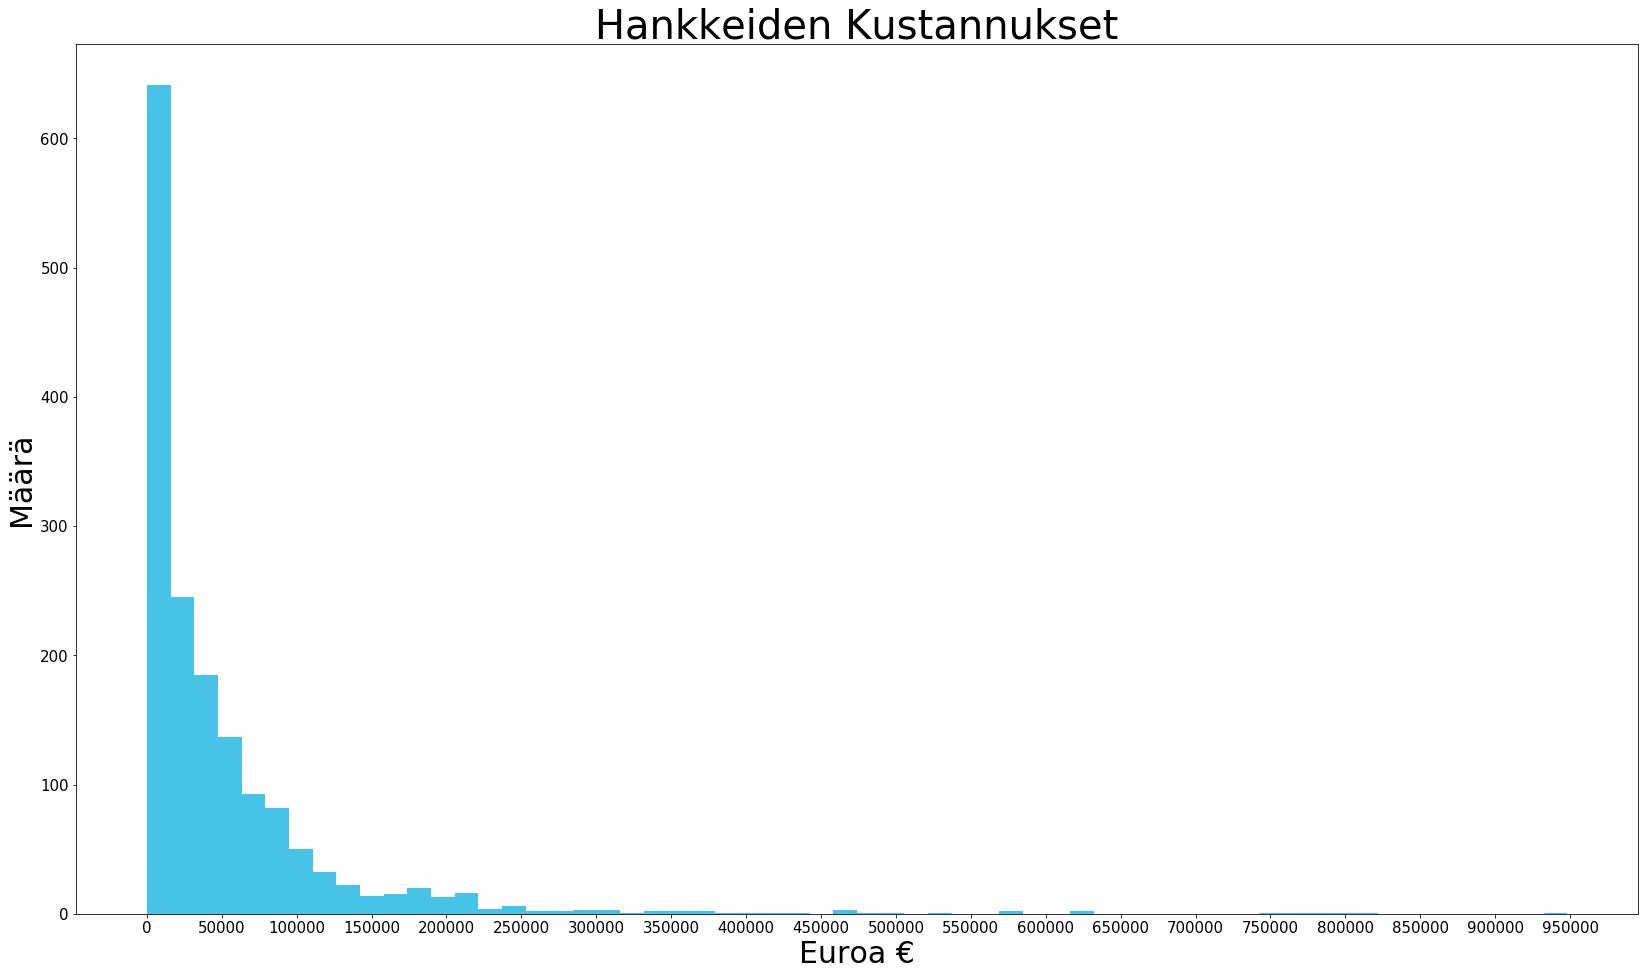

In [61]:
fig, ax = plt.subplots(figsize = (28, 16))
plt.xticks(x_ticks)
# sbn.barplot(list(projects_costs.values()))
ax.set_xlabel('Euroa €', fontsize = 30)
ax.set_ylabel('Määrä', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_title('Hankkeiden Kustannukset', fontsize = 40)
plt.hist(list(project_costs.values()), bins = 60, color = "#46C3E7")
# sbn.distplot(list(projects_costs.values()), hist=True, kde=False)
# sbn.histplot´
# sbn.histplot(list(projects_costs.values()))
plt.savefig('data/kokomaa_kaikkiteemat_kaikkikoulutusasteet_rahoituksensuuruus.png')
plt.show()


### Peruskoulu

In [62]:
project_amount = len(project_costs.values())

In [63]:
costs = list(project_costs.values())

In [64]:
n, p = 1, .24
binomial = np.random.binomial(n, p, project_amount)

In [65]:
peruskoulu_costs = []
for i in range(project_amount):
    if(binomial[i]):
        peruskoulu_costs.append(costs[i])

In [66]:
len(peruskoulu_costs)

416

In [67]:
x_ticks = np.arange(0, 1000000, 50000)

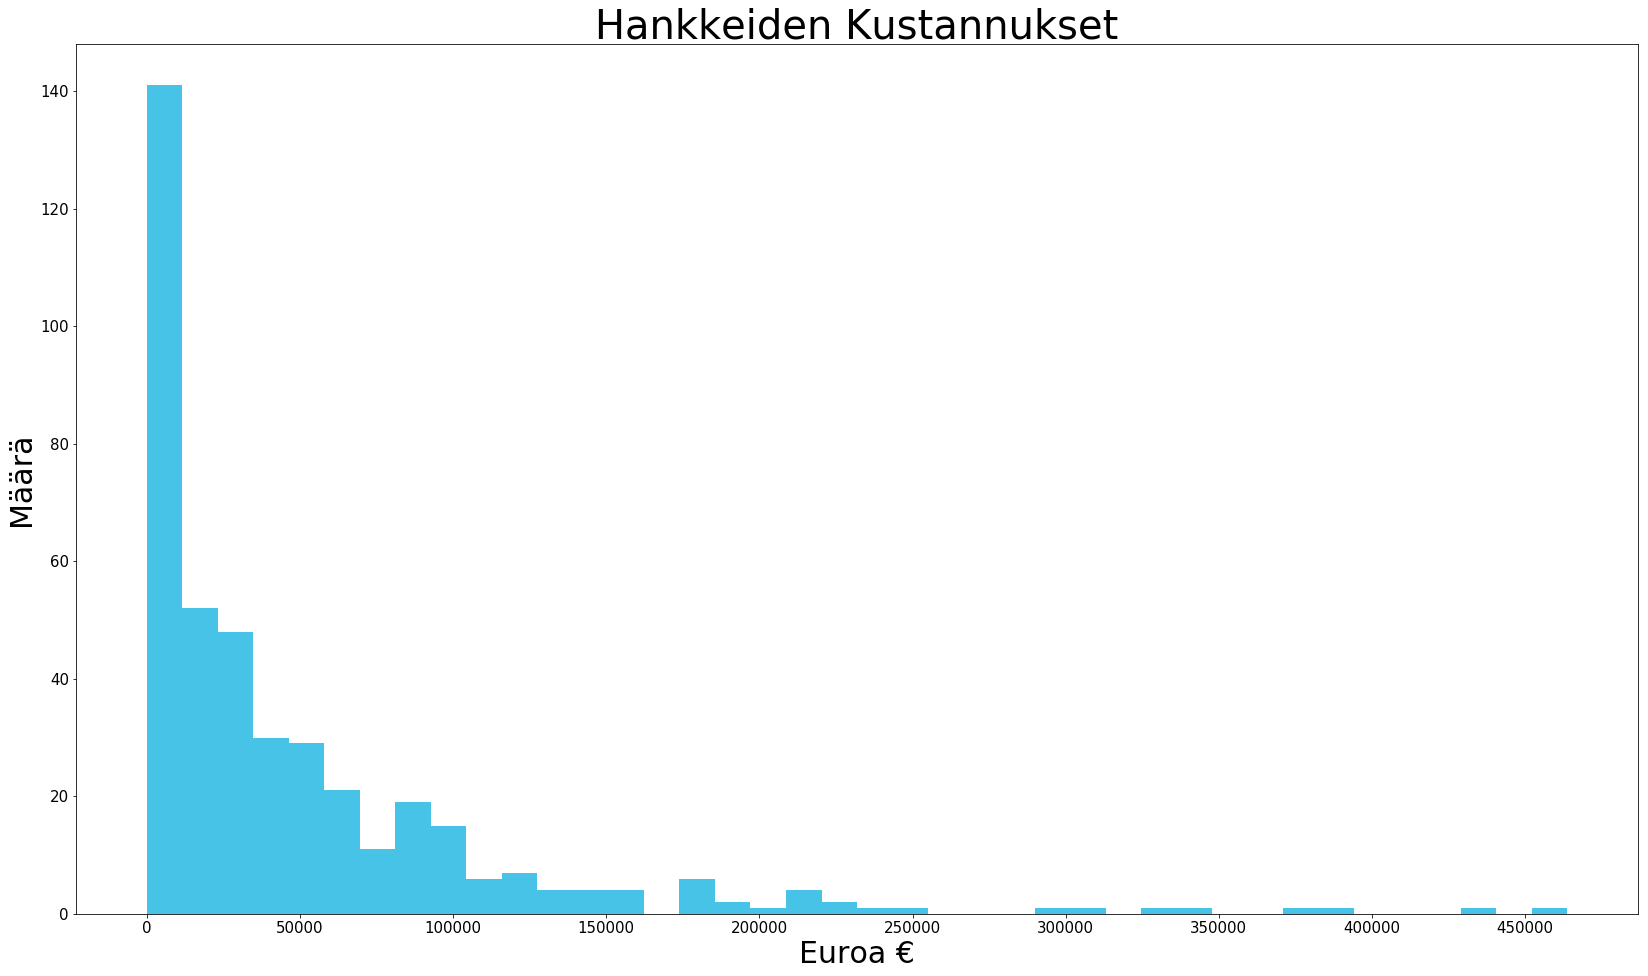

In [68]:
fig, ax = plt.subplots(figsize = (28, 16))
plt.xticks(x_ticks)
# sbn.barplot(list(projects_costs.values()))
ax.set_xlabel('Euroa €', fontsize = 30)
ax.set_ylabel('Määrä', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_title('Hankkeiden Kustannukset', fontsize = 40)
plt.hist(peruskoulu_costs, bins = 40, color = "#46C3E7")
# sbn.distplot(list(peruskoulu_costs), hist=True, kde=False)
# sbn.histplot´
# sbn.histplot(list(projects_costs.values()))
plt.savefig('data/kokomaa_kaikkiteemat_peruskoulu_rahoituksensuuruus.png')
plt.show()

### Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017

In [69]:
funding_release_id = 82 
funding_release_name = funding_releases[funding_release_id]; funding_release_name

'Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017'

In [70]:
project_for_funding = [report for report in data["loppuselvitys"] if(report["haku_id"] == funding_release_id)]

In [71]:
def total_costs(project):
    total_costs = 0
    for question in project['loppuselvitys_answers']["value"]:
        keys = question.keys()
        if("key" in keys):
            if("costs" in question["key"] and "amount" in question["key"] ):
                # print("Cost")
                # print(question["value"] == "")
                if(question["value"] != ""):
                    total_costs += int(question["value"])
                # print(question["key"])
                # print(question["value"])
    return total_costs

In [72]:
project_costs = {}
for project in project_for_funding:
    name = project['project_name']
    cost = total_costs(project)
    project_costs[name] = cost

In [73]:
len(project_costs)

25

In [74]:
x_ticks = np.arange(0, 1000000, 50000)

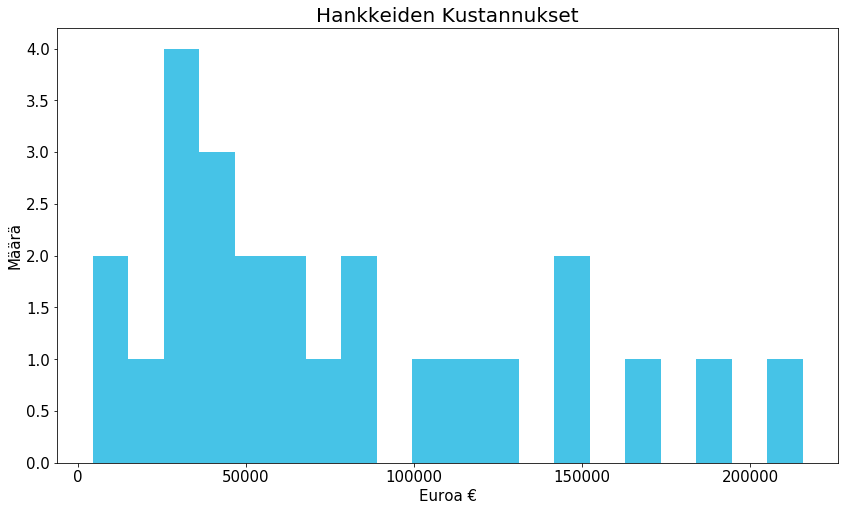

In [75]:
fig, ax = plt.subplots(figsize = (14, 8))
plt.xticks(x_ticks)
# sbn.barplot(list(projects_costs.values()))
ax.set_xlabel('Euroa €', fontsize = 15)
ax.set_ylabel('Määrä', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_title('Hankkeiden Kustannukset', fontsize = 20)
plt.hist(list(project_costs.values()), bins = 20, color = "#46C3E7")
# sbn.distplot(list(projects_costs.values()), bins=12, hist=True, kde=False, color="#1f77b4")
# sbn.histplot´
# sbn.histplot(list(projects_costs.values()))
plt.savefig('data/kokomaa_kaikkiteemat_kaikkikoulutusasteet_innovaatio_rahoituksensuuruus.png')
plt.show()


## Rahoitusten Määrät

### Kaikki kategoriat

In [234]:
project_costs = {}
for project in data["loppuselvitys"]:
    name = project['project_name']
    cost = total_costs(project)
    project_costs[name] = cost

In [235]:
project_amount = len(project_costs.values()); project_amount

1612

In [236]:
costs = np.array(list(project_costs.values())).sum(); costs

83476239

In [237]:
municipality_projects_costs = np.array(list(percentage_of_total_populuation.values())) * costs
municipality_projects_costs = municipality_projects_costs * np.random.normal(1, 0.1, size=m)

In [238]:
df = pd.DataFrame()
df["Kunta" ] = municipality_names
df["Hannkeiden Kustannukset"] = municipality_projects_costs

In [239]:
df = df.sort_values("Hannkeiden Kustannukset", ascending = False)

In [240]:
m, n = df.shape

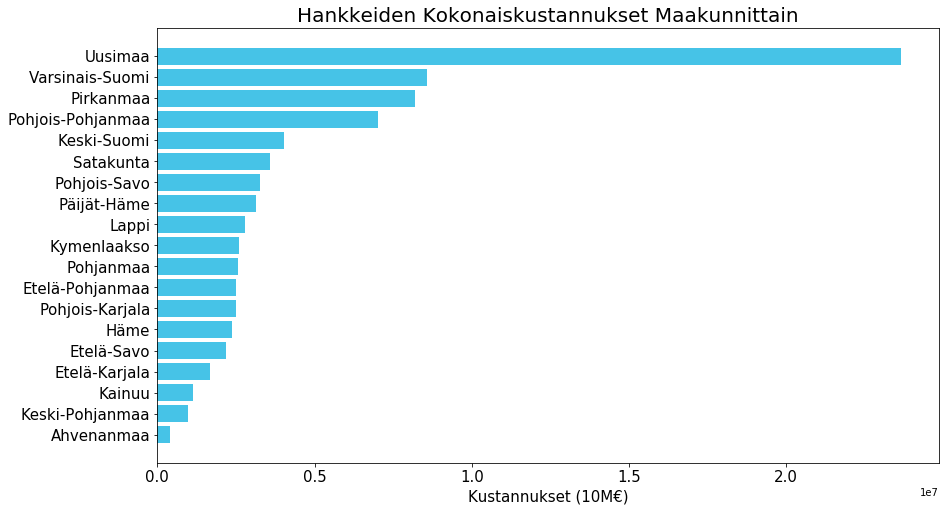

In [241]:
fig, ax = plt.subplots(figsize = (14, 8))

ax.barh(df["Kunta"], df["Hannkeiden Kustannukset"], align='center', color = "#46C3E7")
# ax.set_yticks(m)
plt.xticks(fontsize = 15)
ax.set_xlabel('Määrä', fontsize = 15)
ax.set_yticklabels(df["Kunta"], fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Kustannukset (10M€)')
ax.set_title('Hankkeiden Kokonaiskustannukset Maakunnittain', fontsize = 20)
plt.savefig('data/all_applications_municipalities_costs.png')
plt.show()

### Peruskoulu

In [242]:
project_costs = {}
for project in data["loppuselvitys"]:
    name = project['project_name']
    cost = total_costs(project)
    project_costs[name] = cost

In [243]:
costs = np.array(list(projects_costs.values())).sum() * 0.24; costs

20034297.36

In [244]:
municipality_projects_costs = np.array(list(percentage_of_total_populuation.values())) * costs
municipality_projects_costs = municipality_projects_costs * np.random.normal(1, 0.1, size=m)

In [245]:
df = pd.DataFrame()
df["Kunta" ] = municipality_names
df["Hannkeiden Kustannukset"] = municipality_projects_costs

In [246]:
df = df.sort_values("Hannkeiden Kustannukset", ascending = False)

In [247]:
m, n = df.shape

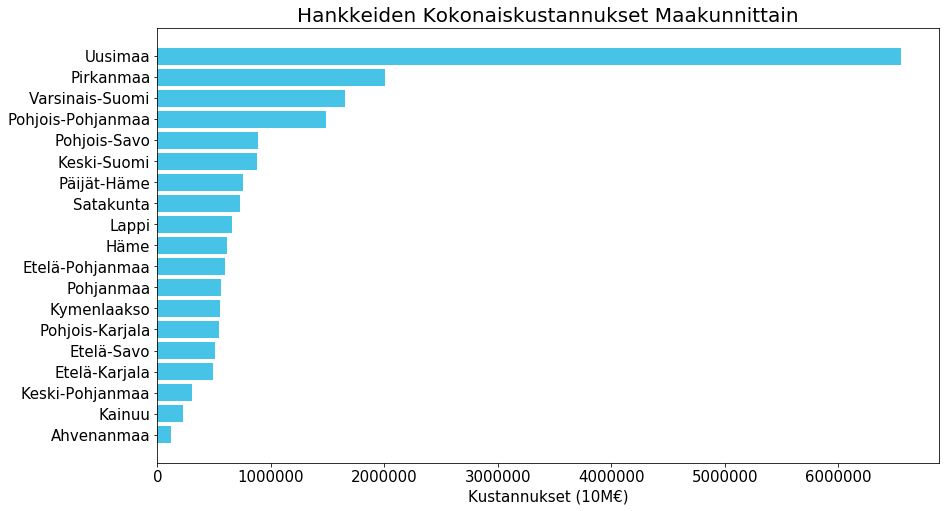

In [248]:
fig, ax = plt.subplots(figsize = (14, 8))

ax.barh(df["Kunta"], df["Hannkeiden Kustannukset"], align='center', color = "#46C3E7")
# ax.set_yticks(m)
plt.xticks(fontsize = 15)
ax.set_xlabel('Kustannukset (10M€)', fontsize = 15)
ax.invert_yaxis()
ax.set_yticklabels(df["Kunta"], fontsize=15)
ax.set_title('Hankkeiden Kokonaiskustannukset Maakunnittain', fontsize=20)
plt.savefig('data/peruskoulu_applications_municipalities_costs.png')
plt.show()

### Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017

In [249]:
funding_release_id = 82 
funding_release_name = funding_releases[funding_release_id]; funding_release_name

'Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017'

In [250]:
project_for_funding = [report['project_name'] for report in data["loppuselvitys"] if(report["haku_id"] == funding_release_id)]

In [251]:
project_costs = {}
for project in data["loppuselvitys"]:
    name = project['project_name']
    if(name in project_for_funding):
        cost = total_costs(project)
        project_costs[name] = cost

In [252]:
costs = np.array(list(project_costs.values())).sum(); costs

1974963

Uusimaa
Pirkanmaa
VArsinais Suomi
Keski-suomi
pohjois-pohjanmaa

In [253]:
df = pd.DataFrame()
df["Kunta" ] = municipality_names; df["Kunta" ]

0               Uusimaa
1       Varsinais-Suomi
2             Satakunta
3                  Häme
4             Pirkanmaa
5           Päijät-Häme
6           Kymenlaakso
7         Etelä-Karjala
8            Etelä-Savo
9          Pohjois-Savo
10      Pohjois-Karjala
11          Keski-Suomi
12      Etelä-Pohjanmaa
13            Pohjanmaa
14      Keski-Pohjanmaa
15    Pohjois-Pohjanmaa
16               Kainuu
17                Lappi
18           Ahvenanmaa
Name: Kunta, dtype: object

In [254]:
df["Kustannukset" ] = np.array([0.45, 0.2, 0, 0, 0.24, 0, 0, 0, 0, 0, 0, 0.06, 0, 0, 0, 0.05, 0, 0, 0]) * costs; df["Kustannukset" ]

0     888733.35
1     394992.60
2          0.00
3          0.00
4     473991.12
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11    118497.78
12         0.00
13         0.00
14         0.00
15     98748.15
16         0.00
17         0.00
18         0.00
Name: Kustannukset, dtype: float64

In [255]:
df = df.sort_values("Kustannukset", ascending = False)

In [256]:
m, n = df.shape

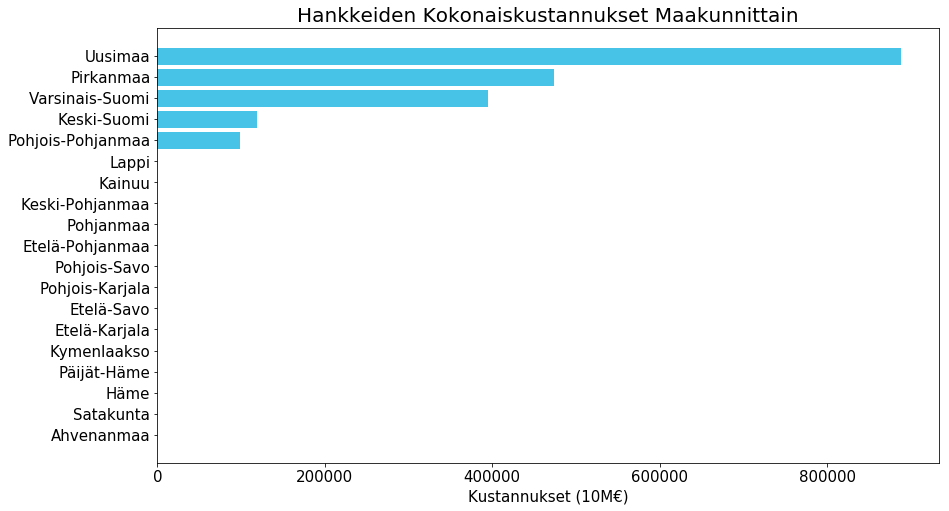

In [258]:
fig, ax = plt.subplots(figsize = (14, 8))
ax.barh(df["Kunta"], df["Kustannukset"], align='center', color = "#46C3E7")
plt.xticks(fontsize = 15)
ax.set_xlabel('Kustannukset (10M€)', fontsize = 15)
ax.set_yticklabels(df["Kunta"], fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_title('Hankkeiden Kokonaiskustannukset Maakunnittain', fontsize=20)
plt.savefig('data/innovation_applications_municipalities_costs.png')
plt.show()

## Subjective Reults on Innovation Project Results

In [76]:
funding_release_id = 82 
funding_release_name = funding_releases[funding_release_id]; funding_release_name

'Innovatiivisten oppimisympäristöjen edistäminen esi- ja perusopetuksessa sekä lukiokoulutuksessa 2017'

In [77]:
project_for_funding = [report for report in data["loppuselvitys"] if(report["haku_id"] == funding_release_id)]

In [78]:
def check_goals_assesment(d):
    keys = d.keys()
    if("key" in keys):
        if(d["key"] == "goals-asessment"):
            results.append(d["value"])
        

In [79]:
def loop_list(value_list):
    for value in value_list:
        if(isinstance(value, dict)):
            check_goals_assesment(value)
            iter_dict(value)

In [80]:
def iter_dict(d):
    for key,value in d.items():
        if isinstance(value, dict):
            # check_goals_assesment(value)
            iter_dict(value)
        elif isinstance(value, list):
            #print(value)
            loop_list(value)

In [81]:
results = []
for report in project_for_funding:
    iter_dict(report)
results = pd.Series(results)

In [82]:
results_counts = results.value_counts()

In [83]:
results_counts = results_counts.sort_index()

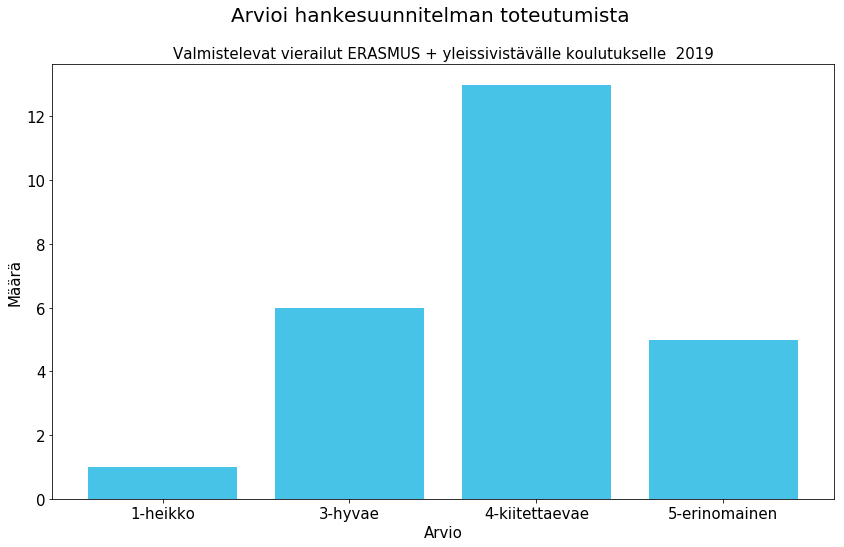

In [84]:
figure = plt.figure(figsize = (14, 8))
plt.bar(results_counts.keys(), results_counts, color = "#46C3E7")
plt.xlabel('Arvio', fontsize = 15)
plt.ylabel('Määrä', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title(project_name, fontsize=15)
plt.suptitle("Arvioi hankesuunnitelman toteutumista", fontsize=20)
plt.savefig('data/kokomaa_kaikkiteemat_kaikkikoulutusasteet_innovaatio_arviot.png')
plt.show()

### Saving Results To csv

In [161]:
def total_costs(project):
    total_costs = 0
    for question in project['loppuselvitys_answers']["value"]:
        keys = question.keys()
        if("key" in keys):
            if("costs" in question["key"] and "amount" in question["key"] ):
                # print("Cost")
                # print(question["value"] == "")
                if(question["value"] != ""):
                    total_costs += int(question["value"])
                # print(question["key"])
                # print(question["value"])
    return total_costs

1612

In [164]:
project_for_funding = [report["project_name"] for report in data["loppuselvitys"] if(report["haku_id"] == funding_release_id)]; len(project_for_funding)

25

In [165]:
all_costs = pd.DataFrame(columns=["Organisaation Nimi", "Kustannukset"])
peruskoulu_costs = pd.DataFrame(columns=["Organisaation Nimi", "Kustannukset"])
innovaation_costs = pd.DataFrame(columns=["Organisaation Nimi", "Kustannukset"])

In [169]:
n, p = 1, .24
binomial = np.random.binomial(n, p, project_amount)

In [171]:
for i in range(project_amount):
    project = data["loppuselvitys"][i]
    project_name = project["project_name"]
    organization_name = project['organization_name']
    cost = total_costs(project)
    all_costs = all_costs.append({"Organisaation Nimi": organization_name, "Kustannukset": cost}, ignore_index=True)
    if(binomial[i]):
        peruskoulu_costs = peruskoulu_costs.append({"Organisaation Nimi": organization_name, "Kustannukset": cost}, ignore_index=True)
    if(project_name in project_for_funding):
        innovaation_costs = innovaation_costs.append({"Organisaation Nimi": organization_name, "Kustannukset": cost}, ignore_index=True)

In [172]:
all_costs.shape

(1613, 2)

In [173]:
peruskoulu_costs.shape

(383, 2)

In [174]:
innovaation_costs.shape

(25, 2)

In [175]:
all_costs.to_csv("data/all_costs.csv", index=False)
peruskoulu_costs.to_csv("data/peruskoulu_costs.csv", index=False)
innovaation_costs.to_csv("data/innovaation_costs.csv", index=False)